In [1]:
import sys
sys.path.append("../../../")

from sklearn.model_selection import KFold
from MultinomialWithEvidence import MultinomialNB
from TFIDFVectorizer import TFIDF
import pandas as pd
from preprocessing import preprocessing_text_with_lemma
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
fix_file = "../../../dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)

In [3]:
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_lemma)

In [4]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [5]:
import sys
sys.path.append("..")

from KFold import KF

kf = KF(X, y, 0.1)
kf.split()

{0: 0.052, 1: 0.948}
{0: 0.987, 1: 0.013}
{0: 0.973, 1: 0.027}
{0: 0.826, 1: 0.174}
{0: 0.0, 1: 1.0}
{0: 0.874, 1: 0.126}
{0: 0.376, 1: 0.624}
{0: 0.295, 1: 0.705}
{0: 0.393, 1: 0.607}
{0: 0.348, 1: 0.652}
{0: 0.053, 1: 0.947}
{0: 0.065, 1: 0.935}
{0: 0.239, 1: 0.761}
{0: 0.962, 1: 0.038}
{0: 0.954, 1: 0.046}
{0: 0.004, 1: 0.996}
{0: 0.98, 1: 0.02}
{0: 0.964, 1: 0.036}
{0: 0.106, 1: 0.894}
{0: 0.005, 1: 0.995}
{0: 0.68, 1: 0.32}
{0: 0.0, 1: 1.0}
{0: 0.006, 1: 0.994}
{0: 0.004, 1: 0.996}
{0: 0.057, 1: 0.943}
{0: 0.001, 1: 0.999}
{0: 0.033, 1: 0.967}
{0: 0.262, 1: 0.738}
{0: 0.021, 1: 0.979}
{0: 0.001, 1: 0.999}
{0: 0.014, 1: 0.986}
{0: 0.001, 1: 0.999}
{0: 0.994, 1: 0.006}
{0: 0.96, 1: 0.04}
{0: 0.294, 1: 0.706}
{0: 0.48, 1: 0.52}
{0: 0.047, 1: 0.953}
{0: 0.106, 1: 0.894}
{0: 0.305, 1: 0.695}
{0: 0.492, 1: 0.508}
{0: 0.047, 1: 0.953}
{0: 0.017, 1: 0.983}
{0: 0.434, 1: 0.566}
{0: 0.252, 1: 0.748}
{0: 0.243, 1: 0.757}
{0: 0.003, 1: 0.997}
{0: 0.024, 1: 0.976}
{0: 0.01, 1: 0.99}
{0: 0.698,

In [6]:
print("Cross-validation scores:", kf.scores)
print("Mean cross-validation score:", round(np.mean(kf.scores), 3))

Cross-validation scores: [0.833, 0.805, 0.828, 0.818, 0.83, 0.84, 0.797, 0.79, 0.848, 0.807]
Mean cross-validation score: 0.82


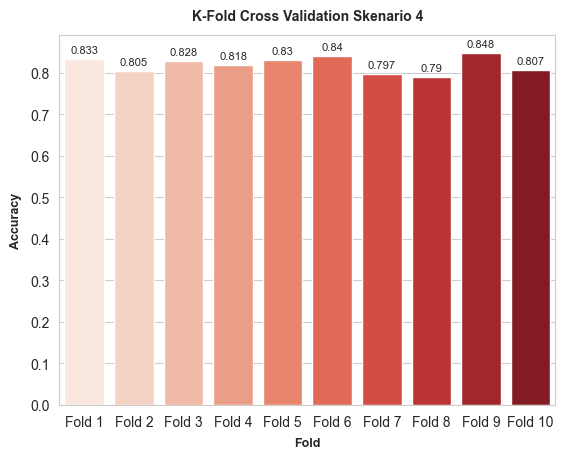

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

scenarios = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
accuracy_values = kf.scores

# Define custom color palette with shades of red and reverse it
custom_palette = sns.color_palette("Reds_r", len(scenarios))[::-1]

sns.set_style('whitegrid')
ax = sns.barplot(x=scenarios, y=accuracy_values, palette=custom_palette)
plt.title('K-Fold Cross Validation Skenario 4', fontsize=10, fontweight='bold', pad=11)
plt.xlabel('Fold', fontsize=9, fontweight='semibold', labelpad=6)  # Add x-axis title
plt.ylabel('Accuracy', fontsize=9, fontweight='semibold', labelpad=6)   # Add y-axis title

# Add numeric values above the bars
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=8)

plt.show()